In [20]:
import numpy as np
import pandas as pd
import correlations
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [21]:
currency_list = ["../data/GBP_CAD_D.pkl", "../data/GBP_USD_D.pkl", "../data/USD_CAD_D.pkl"]
dfs = []
for i in currency_list:
    dfs.append(correlations.get_pickle_df_bid_o(i).rename(correlations.filepath_to_filename(i)))
bonds = pd.read_csv("bond_file_cleaning/BOND_SPREAD.csv")
bonds

,Month,CAD_10Y,UK_10Y,US_10Y,CAD_UK_spread,US_UK_spread,CAD_US_spread
0,2010-01,3.485000,4.426421,3.793,0.941421,-0.633421,0.308000
1,2010-02,3.423684,4.526235,3.611,1.102551,-0.915235,0.187316
2,2010-03,3.490435,4.585615,3.626,1.095180,-0.959615,0.135565
3,2010-04,3.670000,4.571201,3.838,0.901201,-0.733201,0.168000
4,2010-05,3.445500,4.352880,3.693,0.907380,-0.659880,0.247500
...,...,...,...,...,...,...,...
127,2020-08,0.563500,0.761598,0.535,0.198098,-0.226598,-0.028500
128,2020-09,0.559524,0.771977,0.706,0.212453,-0.065977,0.146476
129,2020-10,0.602857,0.805915,0.684,0.203058,-0.121915,0.081143
130,2020-11,0.688500,0.889436,0.879,0.200936,-0.010436,0.190500


In [22]:
currencies = pd.concat(dfs, axis=1).dropna()
currencies

,GBP_CAD_D,GBP_USD_D,USD_CAD_D
time,,,
2009-12-31 22:00:00,1.70091,1.61578,1.05285
2010-01-02 22:00:00,1.70110,1.61542,1.05260
2010-01-03 22:00:00,1.69358,1.61075,1.05078
2010-01-04 22:00:00,1.67493,1.60820,1.04083
2010-01-05 22:00:00,1.66108,1.59902,1.03864
...,...,...,...
2020-12-23 22:00:00,1.73314,1.34900,1.28479
2020-12-27 22:00:00,1.74136,1.35435,1.28520
2020-12-28 22:00:00,1.72774,1.34475,1.28518


In [23]:
bonds = bonds.astype({"Month": np.datetime64})
print(bonds.dtypes)
bonds["Month"] = bonds["Month"].dt.to_period("M")
bonds = bonds.set_index("Month")
bonds

Month            datetime64[ns]
CAD_10Y                 float64
UK_10Y                  float64
US_10Y                  float64
CAD_UK_spread           float64
US_UK_spread            float64
CAD_US_spread           float64
dtype: object


,CAD_10Y,UK_10Y,US_10Y,CAD_UK_spread,US_UK_spread,CAD_US_spread
Month,,,,,,
2010-01,3.485000,4.426421,3.793,0.941421,-0.633421,0.308000
2010-02,3.423684,4.526235,3.611,1.102551,-0.915235,0.187316
2010-03,3.490435,4.585615,3.626,1.095180,-0.959615,0.135565
2010-04,3.670000,4.571201,3.838,0.901201,-0.733201,0.168000
2010-05,3.445500,4.352880,3.693,0.907380,-0.659880,0.247500
...,...,...,...,...,...,...
2020-08,0.563500,0.761598,0.535,0.198098,-0.226598,-0.028500
2020-09,0.559524,0.771977,0.706,0.212453,-0.065977,0.146476
2020-10,0.602857,0.805915,0.684,0.203058,-0.121915,0.081143


In [24]:
currencies = currencies.reset_index()
currencies["time"] = currencies["time"].dt.to_period("M")
currencies = currencies.groupby(["time"]).mean(["GBP_CAD_D", "GBP_USD_D", "USD_CAD_D"])
currencies
# cad_to_gbp_currency = cad_to_gbp_currency.groupby("Month").mean("bid_o")
# cad_to_gbp_currency, cad_to_gbp_bonds

,GBP_CAD_D,GBP_USD_D,USD_CAD_D
time,,,
2009-12,1.700910,1.615780,1.052850
2010-01,1.685733,1.613452,1.044682
2010-02,1.645755,1.559918,1.054990
2010-03,1.540798,1.506156,1.022863
2010-04,1.541256,1.533256,1.005063
...,...,...,...
2020-08,1.737871,1.313064,1.323375
2020-09,1.712069,1.295166,1.321895
2020-10,1.713085,1.297457,1.320449


In [25]:
joined = pd.concat([currencies, bonds], axis=1).dropna()
joined

,GBP_CAD_D,GBP_USD_D,USD_CAD_D,CAD_10Y,UK_10Y,US_10Y,CAD_UK_spread,US_UK_spread,CAD_US_spread
2010-01,1.685733,1.613452,1.044682,3.485000,4.426421,3.793,0.941421,-0.633421,0.308000
2010-02,1.645755,1.559918,1.054990,3.423684,4.526235,3.611,1.102551,-0.915235,0.187316
2010-03,1.540798,1.506156,1.022863,3.490435,4.585615,3.626,1.095180,-0.959615,0.135565
2010-04,1.541256,1.533256,1.005063,3.670000,4.571201,3.838,0.901201,-0.733201,0.168000
2010-05,1.527204,1.467191,1.041030,3.445500,4.352880,3.693,0.907380,-0.659880,0.247500
...,...,...,...,...,...,...,...,...,...
2020-08,1.737871,1.313064,1.323375,0.563500,0.761598,0.535,0.198098,-0.226598,-0.028500
2020-09,1.712069,1.295166,1.321895,0.559524,0.771977,0.706,0.212453,-0.065977,0.146476
2020-10,1.713085,1.297457,1.320449,0.602857,0.805915,0.684,0.203058,-0.121915,0.081143
2020-11,1.726692,1.320170,1.307867,0.688500,0.889436,0.879,0.200936,-0.010436,0.190500


In [26]:
joined["GBP_USD_D"].corr(joined["US_UK_spread"]), pearsonr(joined["GBP_USD_D"], joined["US_UK_spread"])

(-0.8260415215909751,
 PearsonRResult(statistic=-0.8260415215909749, pvalue=3.57082767265077e-34))

In [27]:
joined["USD_CAD_D"].corr(joined["CAD_US_spread"]), pearsonr(joined["USD_CAD_D"], joined["CAD_US_spread"])

(0.7209993360222949,
 PearsonRResult(statistic=0.7209993360222953, pvalue=1.8762728543176423e-22))

In [28]:
joined["GBP_CAD_D"].corr(joined["CAD_UK_spread"]), pearsonr(joined["GBP_CAD_D"], joined["CAD_UK_spread"])

(-0.059451743705990504,
 PearsonRResult(statistic=-0.05945174370599044, pvalue=0.4983100112464013))

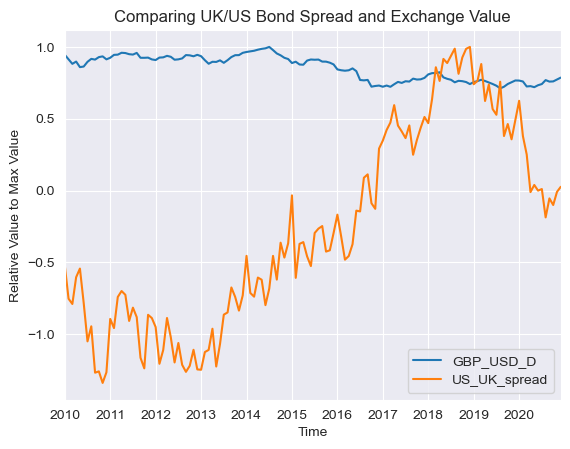

In [15]:
(joined["GBP_USD_D"] / max(joined["GBP_USD_D"])).plot()
(joined["US_UK_spread"] / max(joined["US_UK_spread"])).plot()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Relative Value to Max Value")
plt.title("Comparing UK/US Bond Spread and Exchange Value")
plt.savefig("GBP_USD_BOND_SPREAD_vs_GBP_USD.png", format="png")

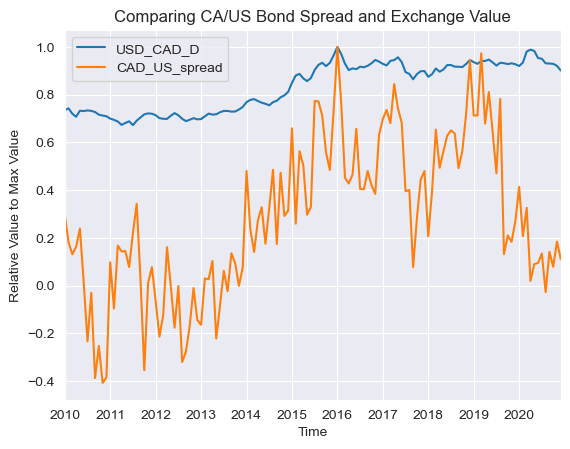

In [18]:
(joined["USD_CAD_D"] / max(joined["USD_CAD_D"])).plot()
(joined["CAD_US_spread"] / max(joined["CAD_US_spread"])).plot()
plt.legend()
plt.ylabel("Relative Value to Max Value")
plt.xlabel("Time")
plt.title("Comparing CA/US Bond Spread and Exchange Value")
plt.savefig("USD_CAD_BOND_SPREAD_vs_USD_CAD.png", format="png")

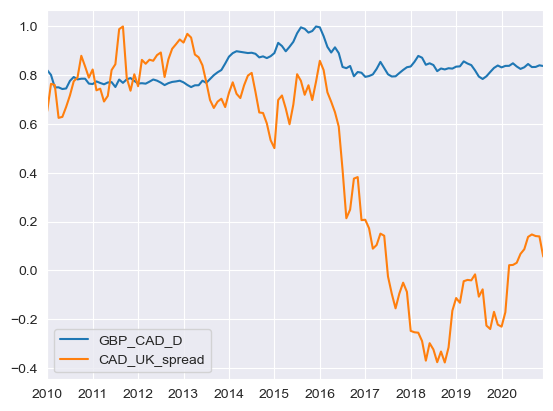

In [19]:
(joined["GBP_CAD_D"] / max(joined["GBP_CAD_D"])).plot()
(joined["CAD_UK_spread"] / max(joined["CAD_UK_spread"])).plot()
plt.legend()
plt.show()